In [193]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import seaborn as sns
import matplotlib.pyplot as plt

In [194]:
Base_DF = pd.read_csv('Spotify_Song_Attributes.csv')
Base_DF.describe()

,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.008000e+04,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9.530000e+03,9530.000000
mean,1.519657e+06,0.602469,0.563524,5.241973,-8.685077,0.612382,0.078468,0.362924,0.153215,0.174589,0.434113,119.374474,2.029311e+05,3.917524
std,5.317343e+06,0.157745,0.243548,3.570615,5.414814,0.487232,0.080101,0.334337,0.313132,0.130749,0.242761,28.993087,9.587253e+04,0.386189
min,0.000000e+00,0.000000,0.001080,0.000000,-42.044000,0.000000,0.000000,0.000002,0.000000,0.024900,0.000000,0.000000,1.002700e+04,0.000000
25%,1.367800e+05,0.509000,0.403000,2.000000,-10.189000,0.000000,0.036100,0.053800,0.000000,0.096200,0.237000,97.568000,1.616970e+05,4.000000
50%,2.662875e+05,0.623000,0.589000,5.000000,-7.218000,1.000000,0.047900,0.245000,0.000025,0.119000,0.409000,119.822000,1.942860e+05,4.000000
75%,1.186307e+06,0.714000,0.751000,8.000000,-5.336000,1.000000,0.081900,0.668000,0.027600,0.209000,0.614000,139.785000,2.295260e+05,4.000000
max,1.583671e+08,0.976000,0.999000,11.000000,3.010000,1.000000,0.966000,0.996000,0.993000,0.964000,0.986000,236.196000,4.581483e+06,5.000000


In [195]:
pd.set_option('display.max_columns', None)
Base_DF.head()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,0.0162,0.000000,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,0.9160,0.956000,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,0.0164,0.000000,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,0.4750,0.203000,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,0.0158,0.000169,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0


In [196]:
Popularity_DF = pd.read_csv('Spotify_Popularity_Scores.csv')
Popularity_DF.describe()

,popularity
count,9530.000000
mean,44.947534
std,23.864771
min,0.000000
25%,31.000000
50%,48.000000
75%,63.000000
max,93.000000


In [197]:
Popularity_DF.head()

,id,name,popularity
0,7dTxqsaFGHOXwtzHINjfHv,"""Honest""",44
1,14Qcrx6Dfjvcj0H8oV8oUW,"""In The Hall Of The Mountain King"" from Peer G...",54
2,7K9Z3yFNNLv5kwTjQYGjnu,#BrooklynBloodPop!,5
3,3koAwrM1RO0TGMeQJ3qt9J,$10,53
4,4ByEFOBuLXpCqvO1kw8Wdm,(I Just) Died In Your Arms,81


In [198]:
Cleaned_DF = Base_DF.dropna(subset=['id'])
cleanLEN = len(Cleaned_DF)
baseLEN = len(Base_DF)

print(f"Cleaned DataFrame length: {cleanLEN}")
print(f"Base DataFrame length: {baseLEN}")

Cleaned DataFrame length: 9530
Base DataFrame length: 10080


In [199]:
Cleaned_DF['popularity'] = pd.NA

C:\Users\andad\AppData\Local\Temp\ipykernel_18940\2012690112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cleaned_DF['popularity'] = pd.NA


In [200]:
Cleaned_DF.head()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,popularity
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,0.0162,0.000000,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0,<NA>
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,0.9160,0.956000,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0,<NA>
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,0.0164,0.000000,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0,<NA>
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,0.4750,0.203000,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0,<NA>
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,0.0158,0.000169,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0,<NA>


In [201]:
for idx, row in Popularity_DF.iterrows():
    TrackID = row['id']
    TrackPopularity = row['popularity']
    
    match = Cleaned_DF.loc[Cleaned_DF['id'] == TrackID]
    if not match.empty:
        Cleaned_DF.at[match.index[0], 'popularity'] = TrackPopularity

Cleaned_DF.head()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,popularity
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,0.0162,0.000000,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0,44
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,0.9160,0.956000,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0,54
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,0.0164,0.000000,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0,5
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,0.4750,0.203000,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0,53
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,0.0158,0.000169,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0,81


In [202]:
Cleaned_DF.drop(columns=['id', 'track_href','analysis_url','uri','type'], inplace=True)

C:\Users\andad\AppData\Local\Temp\ipykernel_18940\1781338285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cleaned_DF.drop(columns=['id', 'track_href','analysis_url','uri','type'], inplace=True)


In [203]:
Cleaned_DF.head()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,0.0162,0.000000,0.2570,0.577,162.139,191948.0,4.0,44
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,0.9160,0.956000,0.1010,0.122,112.241,150827.0,4.0,54
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,0.0164,0.000000,0.3660,0.509,132.012,145611.0,4.0,5
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,0.4750,0.203000,0.1190,0.896,120.969,89509.0,4.0,53
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,0.0158,0.000169,0.0625,0.507,124.945,280400.0,4.0,81


In [204]:
Cleaned_DF.describe()

,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,9.530000e+03,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9.530000e+03,9530.000000
mean,1.526888e+06,0.602469,0.563524,5.241973,-8.685077,0.612382,0.078468,0.362924,0.153215,0.174589,0.434113,119.374474,2.029311e+05,3.917524
std,5.394146e+06,0.157745,0.243548,3.570615,5.414814,0.487232,0.080101,0.334337,0.313132,0.130749,0.242761,28.993087,9.587253e+04,0.386189
min,0.000000e+00,0.000000,0.001080,0.000000,-42.044000,0.000000,0.000000,0.000002,0.000000,0.024900,0.000000,0.000000,1.002700e+04,0.000000
25%,1.389890e+05,0.509000,0.403000,2.000000,-10.189000,0.000000,0.036100,0.053800,0.000000,0.096200,0.237000,97.568000,1.616970e+05,4.000000
50%,2.702730e+05,0.623000,0.589000,5.000000,-7.218000,1.000000,0.047900,0.245000,0.000025,0.119000,0.409000,119.822000,1.942860e+05,4.000000
75%,1.203478e+06,0.714000,0.751000,8.000000,-5.336000,1.000000,0.081900,0.668000,0.027600,0.209000,0.614000,139.785000,2.295260e+05,4.000000
max,1.583671e+08,0.976000,0.999000,11.000000,3.010000,1.000000,0.966000,0.996000,0.993000,0.964000,0.986000,236.196000,4.581483e+06,5.000000


C:\Users\andad\AppData\Local\Temp\ipykernel_18940\3904985259.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=GenrePopularity_DF.index, y=GenrePopularity_DF.values, palette='viridis')


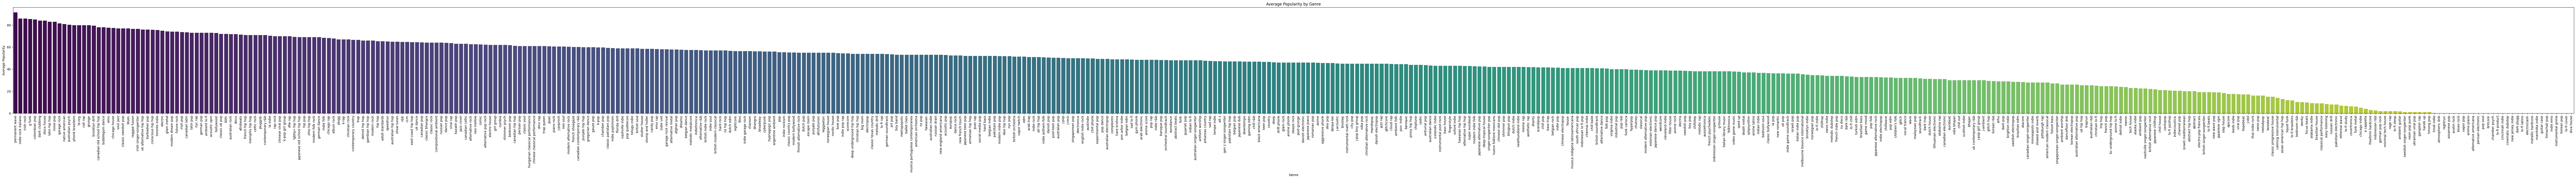

In [205]:
GenrePopularity_DF = Cleaned_DF.groupby('genre')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(144, 6))
sns.barplot(x=GenrePopularity_DF.index, y=GenrePopularity_DF.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.show()

C:\Users\andad\AppData\Local\Temp\ipykernel_18940\1431611795.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='msPlayed',y='trackName', data=TopPlayedByMS, palette='viridis')
C:\Users\andad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\andad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39321 (\N{CJK UNIFIED IDEOGRAPH-9999}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\andad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

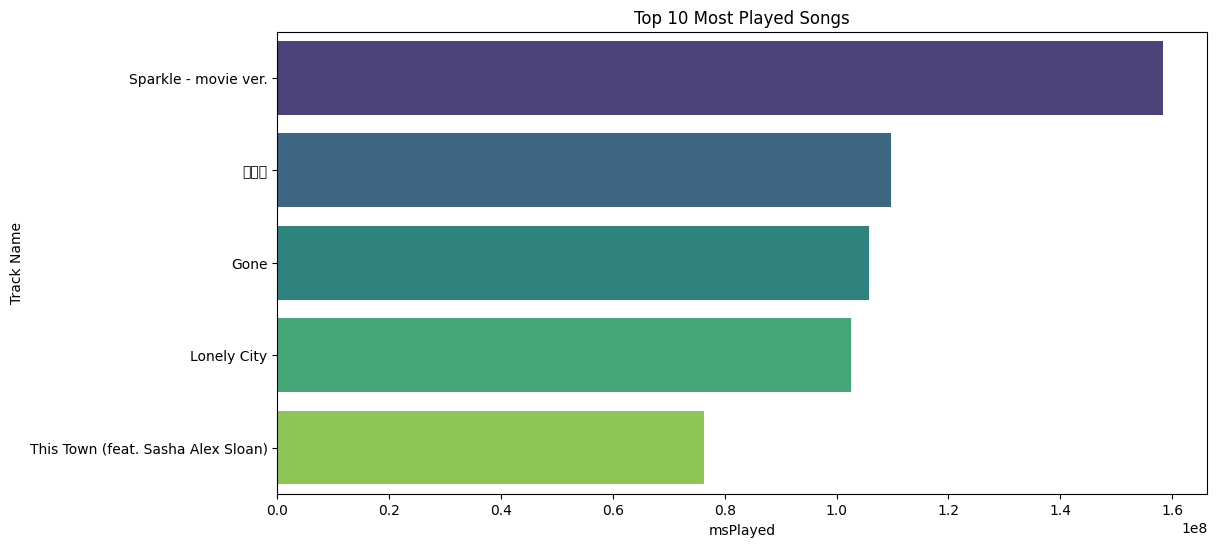

In [206]:
TopPlayedByMS = Cleaned_DF.sort_values(by='msPlayed', ascending=False).head(10)
TopPopularityByScore = Cleaned_DF.sort_values(by='popularity', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='msPlayed',y='trackName', data=TopPlayedByMS, palette='viridis')
plt.title('Top 10 Most Played Songs')
plt.xlabel('msPlayed')
plt.ylabel('Track Name')
plt.show()

C:\Users\andad\AppData\Local\Temp\ipykernel_18940\2296883153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity',y='trackName', data=TopPopularityByScore, palette='rainbow')


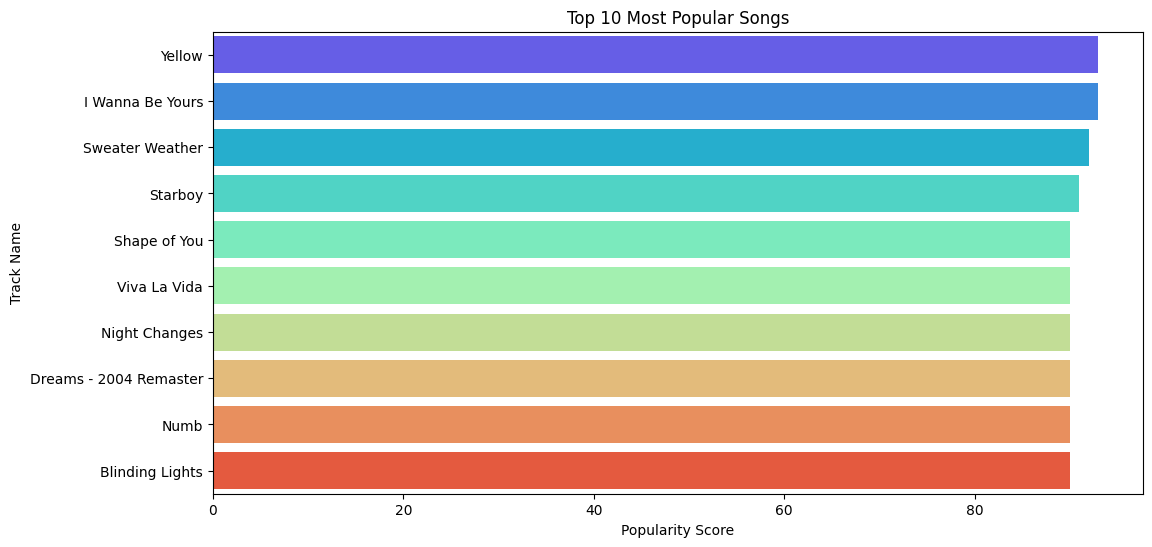

In [207]:
plt.figure(figsize=(12, 6))
sns.barplot(x='popularity',y='trackName', data=TopPopularityByScore, palette='rainbow')
plt.title('Top 10 Most Popular Songs')
plt.xlabel('Popularity Score')
plt.ylabel('Track Name')
plt.show()

C:\Users\andad\AppData\Local\Temp\ipykernel_18940\822610686.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=GenreByMSPlayed.index, y=GenreByMSPlayed.values, palette='viridis')


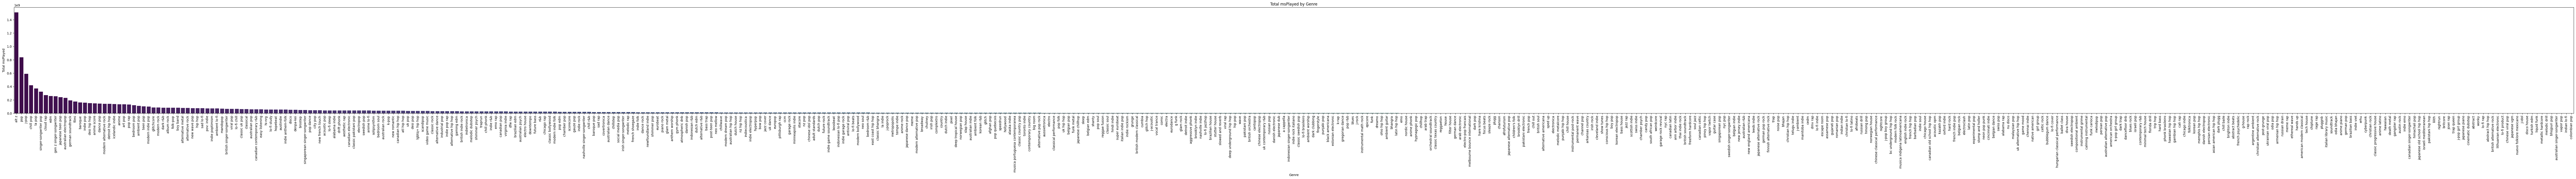

In [208]:
GenreByMSPlayed = Cleaned_DF.groupby('genre')['msPlayed'].sum().sort_values(ascending=False)
GenreAVGPopularity = Cleaned_DF.groupby('genre')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(144, 6))
sns.barplot(x=GenreByMSPlayed.index, y=GenreByMSPlayed.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Total msPlayed by Genre')
plt.xlabel('Genre')
plt.ylabel('Total msPlayed')
plt.show()

C:\Users\andad\AppData\Local\Temp\ipykernel_18940\2970388488.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=GenreAVGPopularity.index, y=GenreAVGPopularity.values, palette='viridis')


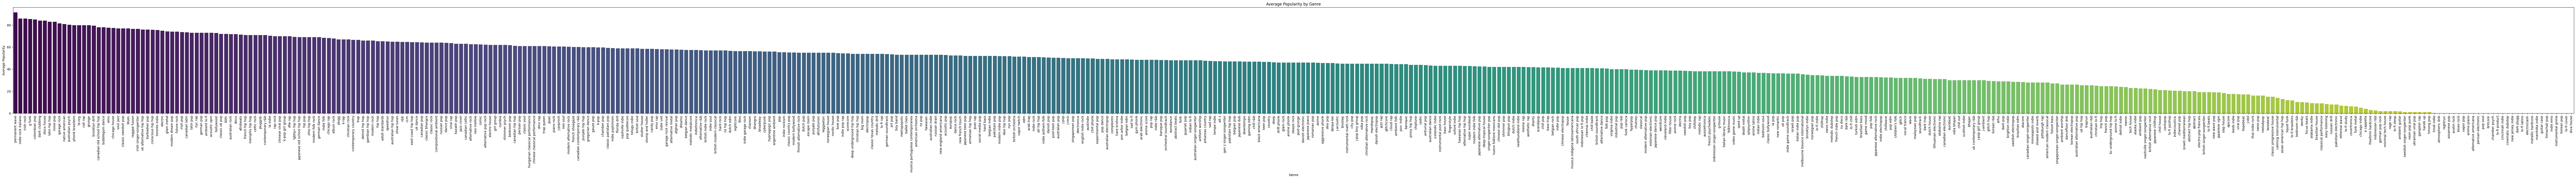

In [209]:
plt.figure(figsize=(144, 6))
sns.barplot(x=GenreAVGPopularity.index, y=GenreAVGPopularity.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.show()

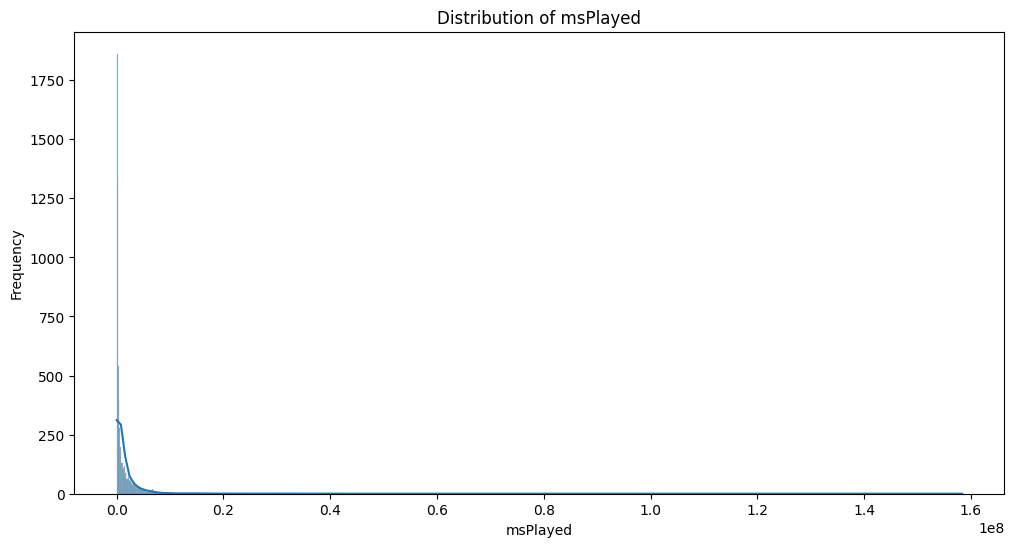

In [210]:
plt.figure(figsize=(12, 6))
sns.histplot(Cleaned_DF['msPlayed'], kde=True)
plt.title('Distribution of msPlayed')
plt.xlabel('msPlayed')
plt.ylabel('Frequency')
plt.show()

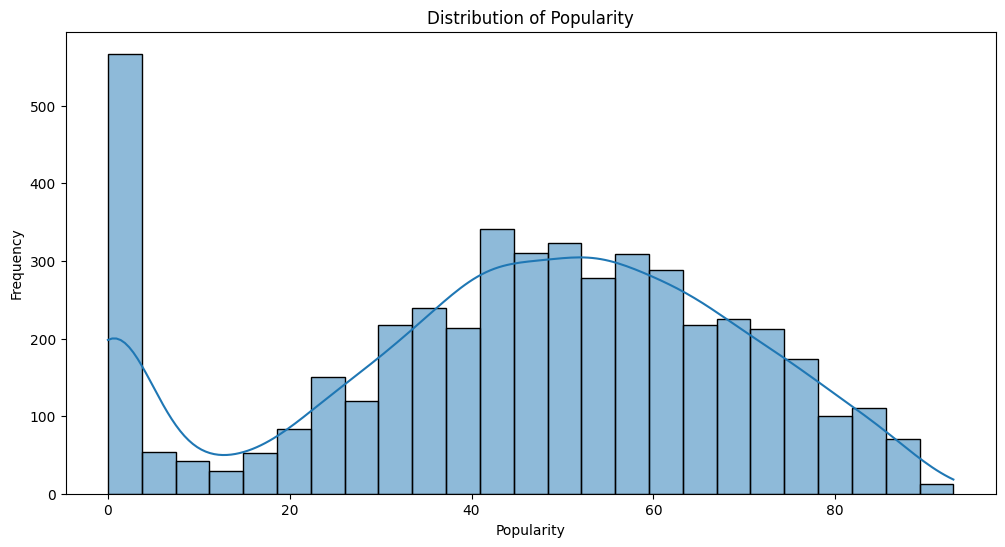

In [211]:
plt.figure(figsize=(12, 6))
sns.histplot(Cleaned_DF['popularity'], kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

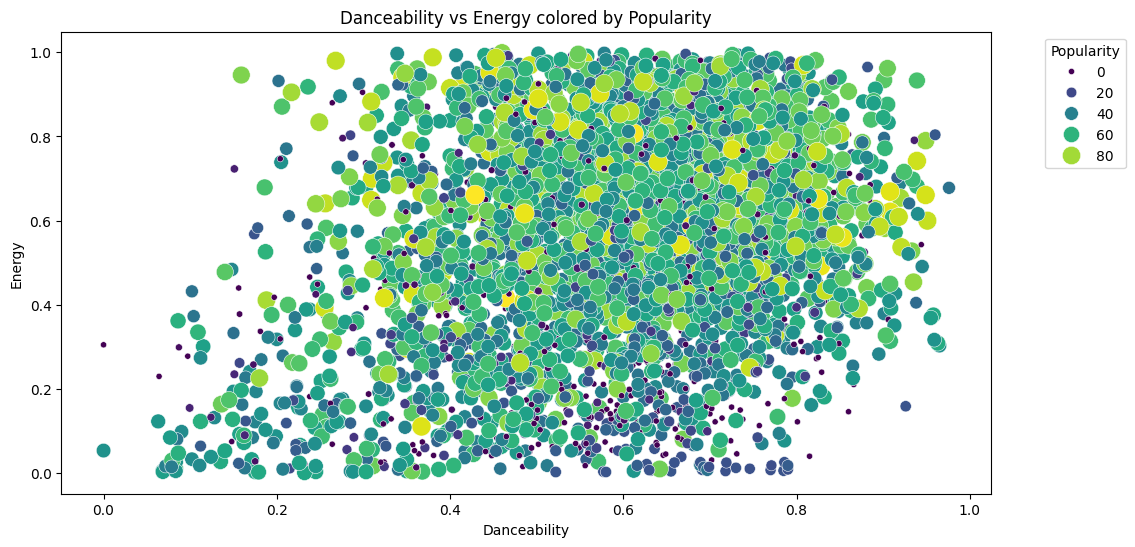

In [212]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Cleaned_DF, x='danceability', y='energy', hue='popularity', palette='viridis', size='popularity', sizes=(20,200))
plt.title('Danceability vs Energy colored by Popularity')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend(title='Popularity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [213]:
Cleaned_DF.head()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,0.0162,0.000000,0.2570,0.577,162.139,191948.0,4.0,44
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,0.9160,0.956000,0.1010,0.122,112.241,150827.0,4.0,54
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,0.0164,0.000000,0.3660,0.509,132.012,145611.0,4.0,5
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,0.4750,0.203000,0.1190,0.896,120.969,89509.0,4.0,53
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,0.0158,0.000169,0.0625,0.507,124.945,280400.0,4.0,81


In [214]:
Cleaned_DF.dtypes

trackName            object
artistName           object
msPlayed              int64
genre                object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
popularity           object
dtype: object

In [215]:
Cleaned_DF['popularity'] = pd.to_numeric(Cleaned_DF['popularity'], errors='coerce')

C:\Users\andad\AppData\Local\Temp\ipykernel_18940\1015913533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cleaned_DF['popularity'] = pd.to_numeric(Cleaned_DF['popularity'], errors='coerce')


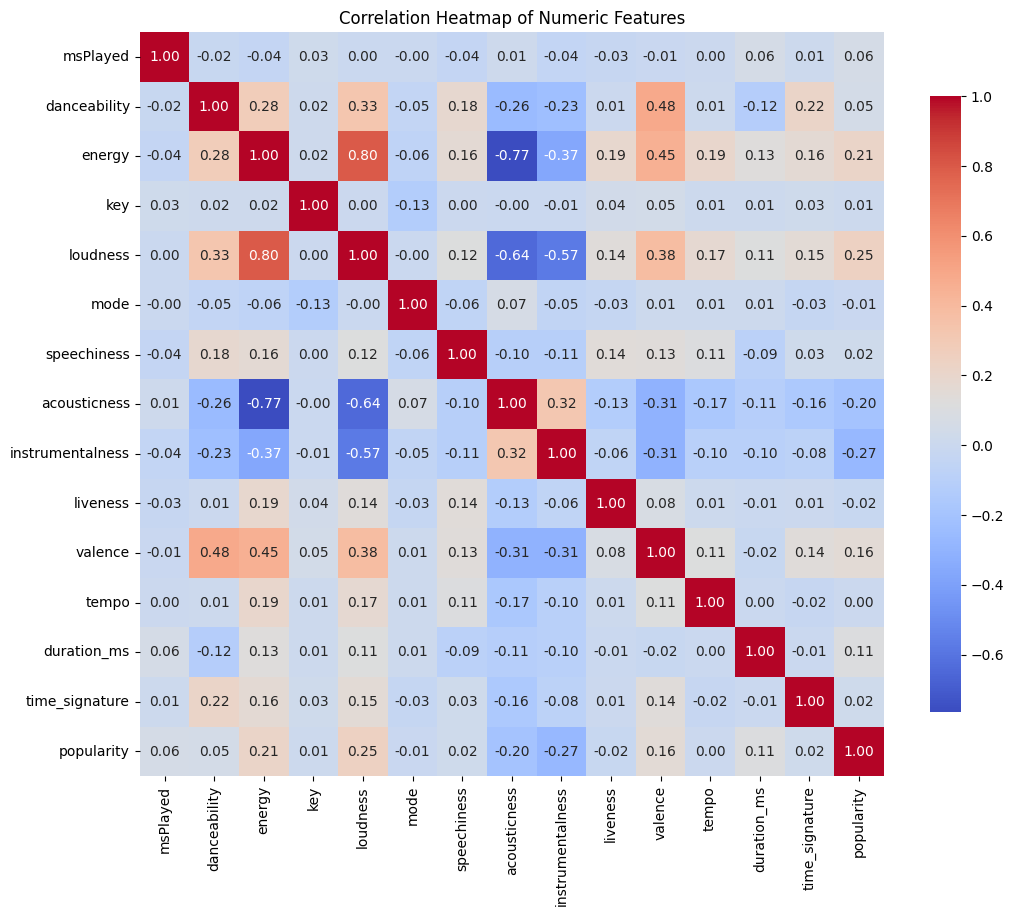

In [216]:
numeric_feature_correlation = Cleaned_DF.select_dtypes(include=['float64', 'int64'])
corr = numeric_feature_correlation.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [217]:
Cleaned_DF.dropna(inplace=True)
print(f"DataFrame length after dropping NaN values: {len(Cleaned_DF)}")
print(Cleaned_DF.describe())
print(Cleaned_DF.dtypes)
print(Cleaned_DF.isnull().sum())


DataFrame length after dropping NaN values: 4261
           msPlayed  danceability       energy          key     loudness  \
count  4.261000e+03   4261.000000  4261.000000  4261.000000  4261.000000   
mean   1.539529e+06      0.601372     0.566847     5.247829    -8.574774   
std    5.576372e+06      0.158527     0.241661     3.574896     5.324415   
min    0.000000e+00      0.000000     0.001080     0.000000   -42.044000   
25%    1.398700e+05      0.507000     0.407000     2.000000   -10.008000   
50%    2.702730e+05      0.622000     0.592000     5.000000    -7.132000   
75%    1.215632e+06      0.714000     0.753000     8.000000    -5.312000   
max    1.583671e+08      0.976000     0.999000    11.000000     3.010000   

              mode  speechiness  acousticness  instrumentalness     liveness  \
count  4261.000000  4261.000000   4261.000000       4261.000000  4261.000000   
mean      0.616522     0.078437      0.358027          0.149467     0.174809   
std       0.486290     0.0

C:\Users\andad\AppData\Local\Temp\ipykernel_18940\3102963552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cleaned_DF.dropna(inplace=True)


In [ ]:
Target_feature = 'popularity'

artist_target_mean = Cleaned_DF.groupby('artistName')[Target_feature].mean()
track_target_mean = Cleaned_DF.groupby('trackName')[Target_feature].mean()

X_raw = Cleaned_DF.drop(columns=[Target_feature])
X_raw['artist_encoded'] = X_raw['artistName'].map(artist_target_mean)
X_raw['track_encoded'] = X_raw['trackName'].map(track_target_mean)
X_raw['genre'] = X_raw['genre'].astype('category').cat.codes

X_raw = X_raw.drop(columns=['artistName', 'trackName'])

numerical_columns = [col for col in X_raw.columns if col != 'genre']

scaler = StandardScaler()
X_num = scaler.fit_transform(X_raw[numerical_columns])

X = np.concatenate([X_num, X_raw['genre'].values.reshape(-1, 1)], axis=1)

Y_raw = Cleaned_DF[Target_feature].values

X_train, X_val, y_train, y_val = train_test_split(
    X, Y_raw, test_size=0.2, random_state=42, shuffle=True
)

# ===== Model Architecture =====
model = Sequential([
    Dense(256, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),
    
    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),
    
    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),
    
    Dense(1, activation='linear')
])


optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='huber', metrics=['mae'])


early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop, lr_reduction],
    verbose=1
)

val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation Loss: {val_loss:.4f}, Validation MAE: {val_mae:.4f}')


Epoch 1/100


C:\Users\andad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\andad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 45.4456 - mae: 45.9331 - val_loss: 43.5522 - val_mae: 44.0501 - learning_rate: 5.0000e-04
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.3678 - mae: 44.8576 - val_loss: 42.4234 - val_mae: 42.9218 - learning_rate: 5.0000e-04
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.7208 - mae: 44.2143 - val_loss: 41.1065 - val_mae: 41.6053 - learning_rate: 5.0000e-04
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.4417 - mae: 42.9354 - val_loss: 40.2501 - val_mae: 40.7374 - learning_rate: 5.0000e-04
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.0525 - mae: 41.5485 - val_loss: 39.0496 - val_mae: 39.5401 - learning_rate: 5.0000e-04
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.5451 - mae: 40.0374 - val_loss: 37.5449 - val_mae: 38.0357 - learning_rate: 5.0000e-04
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.3190 - mae: 37.8117 - val_loss: 35.7248 - val_mae: 36.21

In [219]:
df_test = Cleaned_DF.copy()
df_test['artist_encoded'] = df_test['artistName'].map(artist_target_mean)
df_test['track_encoded'] = df_test['trackName'].map(track_target_mean)
mean_popularity = Cleaned_DF['popularity'].mean()
df_test['artist_encoded'] = df_test['artist_encoded'].fillna(mean_popularity)
df_test['track_encoded'] = df_test['track_encoded'].fillna(mean_popularity)
genre_mapping = dict(enumerate(Cleaned_DF['genre'].astype('category').cat.categories))
genre_inverse_mapping = {v: k for k, v in genre_mapping.items()}
df_test['genre'] = df_test['genre'].map(genre_inverse_mapping)
numerical_columns = scaler.feature_names_in_

missing_cols = set(numerical_columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0

df_test = df_test.reindex(columns=list(numerical_columns) + ['genre'])
X_num_test = scaler.transform(df_test[numerical_columns])
X_test_final = np.concatenate([X_num_test, df_test['genre'].values.reshape(-1, 1)], axis=1)
y_true = Cleaned_DF['popularity'].values

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


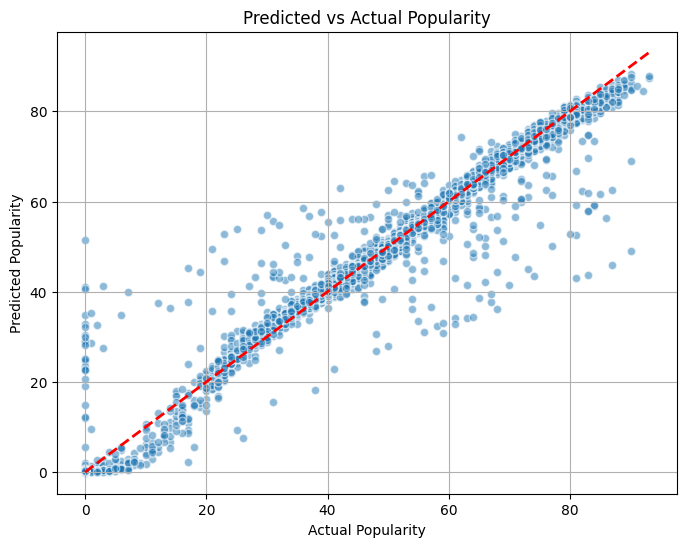

In [220]:

y_pred = model.predict(X_test_final).flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.5, edgecolors='w')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Predicted vs Actual Popularity')
plt.grid(True)
plt.show()

In [221]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 2.10
R² Score: 0.96


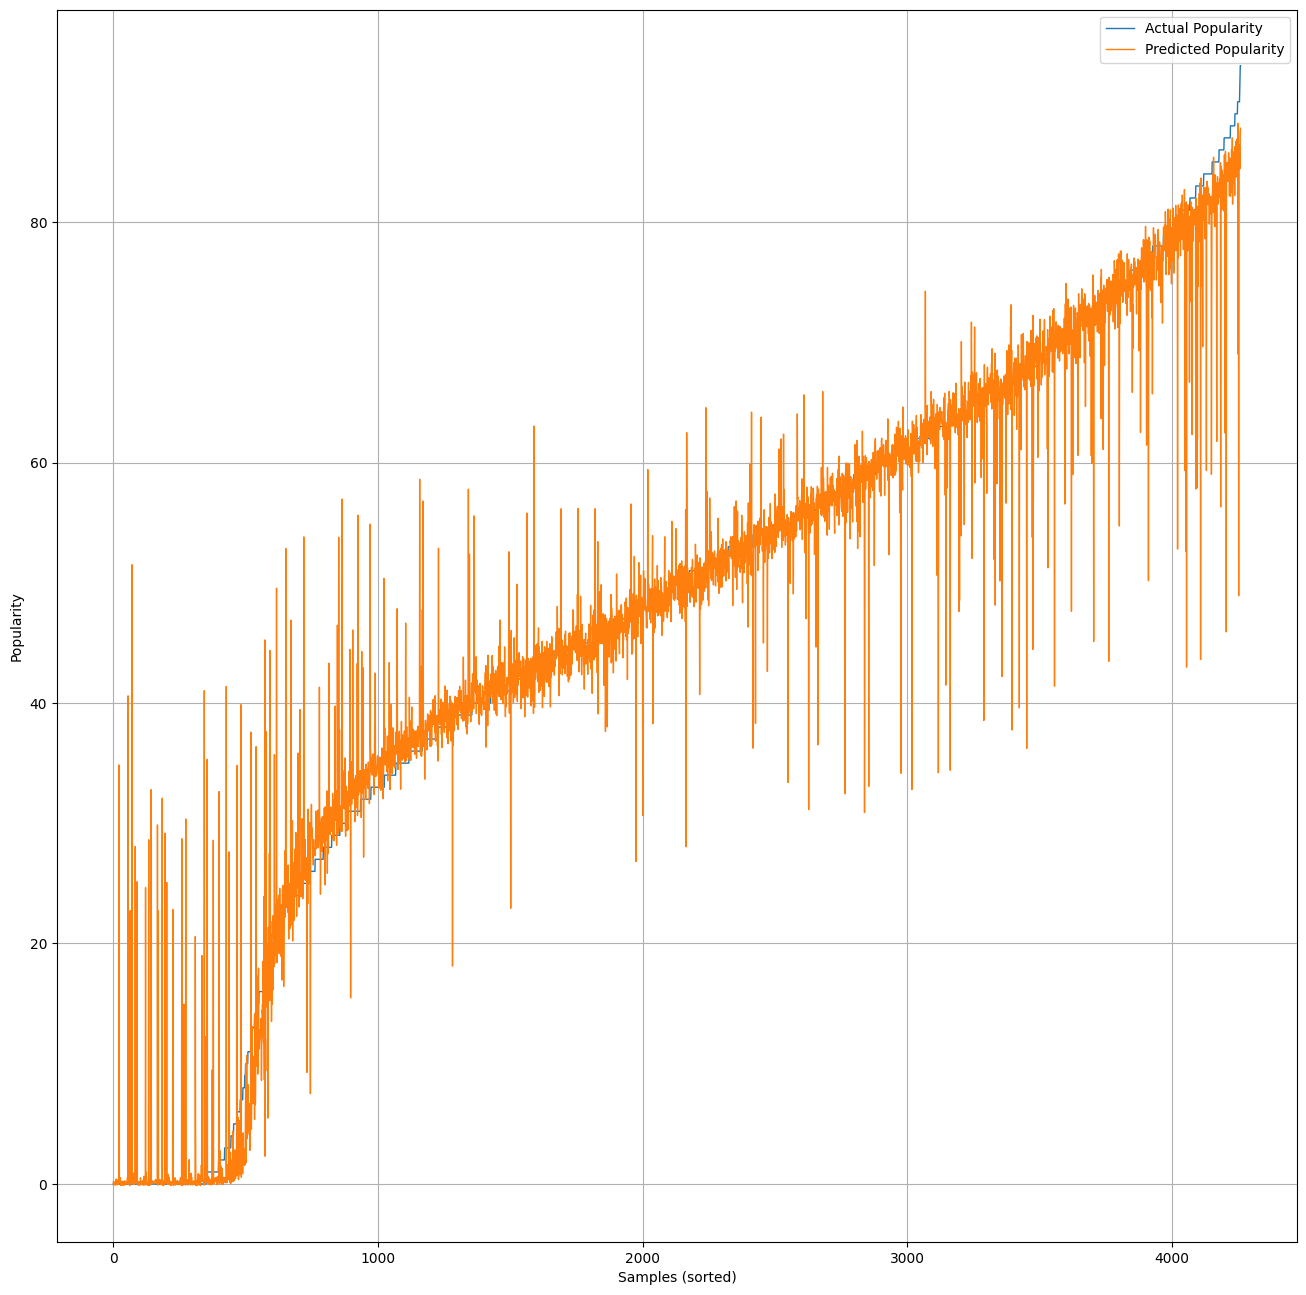

In [224]:
idx = np.argsort(y_true)
y_true_sorted = y_true[idx]
y_pred_sorted = y_pred[idx]
plt.figure(figsize=(16, 16))
plt.plot(y_true_sorted, label='Actual Popularity', linestyle='-', linewidth=1)
plt.plot(y_pred_sorted, label='Predicted Popularity', linestyle='-', linewidth=1)

plt.xlabel('Samples (sorted)')
plt.ylabel('Popularity')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Truncating songs with a popularity score of 0 would improve accuracy